In [1]:
## import packages
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

### Loading data

In [3]:
## load data set 

data = pd.read_csv("Tesla.csv")
data.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
## make sure no missing values.

data.info() # NO missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [ ]:
#Dropping unnecessary columns 


### Splitting into Train and Test

In [5]:
## split the data set into training and validation

length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1692
Train data length : 1184
Validation data lenth : 508


In [6]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open,High,Low,Close
0,2010-06-29,19.000000,25.000000,17.540001,23.889999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000
2,2010-07-01,25.000000,25.920000,20.270000,21.959999
3,2010-07-02,23.000000,23.100000,18.709999,19.200001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001
...,...,...,...,...,...
1179,2015-03-06,199.210007,200.750000,192.149994,193.880005
1180,2015-03-09,194.389999,194.490005,188.250000,190.880005
1181,2015-03-10,188.460007,193.500000,187.600006,190.320007
1182,2015-03-11,191.149994,196.179993,191.009995,193.740005


In [6]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1184,2015-03-13,188.949997
1185,2015-03-16,192.000000
1186,2015-03-17,195.429993
1187,2015-03-18,194.960007
1188,2015-03-19,202.000000
...,...,...
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000
1690,2017-03-16,262.399994


In [7]:
# Taking "Open" column as our train data
# Dataset to be converted to array by adding .values
dataset_train = train_data.Open.values
dataset_train.shape

(1184,)

In [8]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1184, 1)

In [9]:
dataset_train

array([[ 19.      ],
       [ 25.790001],
       [ 25.      ],
       ...,
       [188.460007],
       [191.149994],
       [193.75    ]])

### Normalization/Feature Scaling:

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1184, 1)

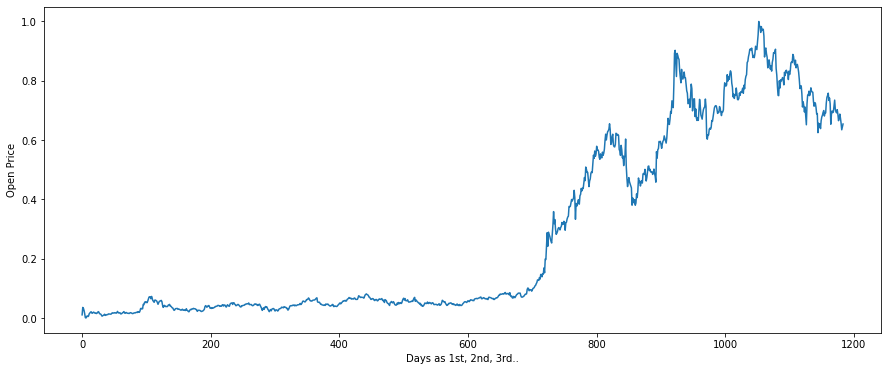

In [11]:
# Plot showing Days vs Open Price. Days = 1184
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [12]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1134, 50)
Shape of y_train before reshape : (1134,)


In [14]:
# Reshaping the train data
# Shape of X_train : 1134 x 50 x 1
# That means we have 1134 rows, each row has 50 rows and 1 column
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1134, 50, 1)
Shape of y_train after reshape : (1134, 1)


In [15]:
# Checking the first row after reshaping: it has 50 rows (open prices of 49 days)
X_train[0]

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       [0.02526425],
       [0.01421574],
       [0.00095754],
       [0.        ],
       [0.00530328],
       [0.00666594],
       [0.00460354],
       [0.00662911],
       [0.01399478],
       [0.01679373],
       [0.01926123],
       [0.02102899],
       [0.01664641],
       [0.01605716],
       [0.01859832],
       [0.01973999],
       [0.01756712],
       [0.0162413 ],
       [0.01705153],
       [0.01495231],
       [0.01605716],
       [0.01789858],
       [0.02139727],
       [0.01988731],
       [0.01458403],
       [0.01384746],
       [0.01292675],
       [0.00939123],
       [0.0061135 ],
       [0.00751299],
       [0.00850735],
       [0.01038559],
       [0.01270578],
       [0.00883881],
       [0.00924392],
       [0.01086436],
       [0.01145362],
       [0.01112216],
       [0.01381063],
       [0.01329503],
       [0.0131109 ],
       [0.01296358],
       [0.01281627],
       [0.0155784 ],
       [0.017

In [16]:
# Check the first item in y_train. It is the price of 51th day
y_train[0]

array([0.01789858])

### Creating RNN model:

In [17]:
# initializing the RNN
model = models.Sequential()

# adding first RNN layer and dropout regularization
model.add(layers.SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (50, 1)))

# adding a dropout layer
model.add(layers.Dropout(0.2))

# adding second RNN layer and dropout regularization
model.add(layers.SimpleRNN(units = 50, activation = "tanh", return_sequences = True))

# adding a dropout layer
model.add(layers.Dropout(0.2))

# adding third RNN layer and dropout regularization
model.add(layers.SimpleRNN(units = 50, activation = "tanh", return_sequences = True))

# adding a dropout layer
model.add(layers.Dropout(0.2))

# adding fourth RNN layer and dropout regularization
model.add(layers.SimpleRNN(units = 50, activation = "tanh", return_sequences = False))

# adding a dropout layer
model.add(layers.Dropout(0.2))

# adding the output layer
model.add(layers.Dense(1, activation='relu'))

In [18]:
# compiling RNN
model.compile(optimizer = "adam", 
              loss = "mean_squared_error",
              metrics = ["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50, 50)            2600      
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50, 50)            5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 50, 50)            5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 50)                5

In [20]:
# fitting the RNN
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 [==============================] - 4s 33ms/step - loss: 0.1493 - accuracy: 0.0000e+00
Epoch 2/50
36/36 [==============================] - 1s 35ms/step - loss: 0.0950 - accuracy: 8.8183e-04
Epoch 3/50
36/36 [==============================] - 1s 37ms/step - loss: 0.1024 - accuracy: 0.0000e+00
Epoch 4/50
36/36 [==============================] - 1s 35ms/step - loss: 0.0892 - accuracy: 8.8183e-04
Epoch 5/50
36/36 [==============================] - 1s 35ms/step - loss: 0.0775 - accuracy: 8.8183e-04
Epoch 6/50
36/36 [==============================] - 1s 37ms/step - loss: 0.0663 - accuracy: 8.8183e-04
Epoch 7/50
36/36 [==============================] - 1s 37ms/step - loss: 0.0597 - accuracy: 8.8183e-04
Epoch 8/50
36/36 [==============================] - 1s 39ms/step - loss: 0.0563 - accuracy: 8.8183e-04
Epoch 9/50
36/36 [==============================] - 2s 46ms/step - loss: 0.0440 - accuracy: 8.8183e-04
Epoch 10/50
36/36 [==============================] - 2s 42ms/step - loss:

In [21]:
### Evaluating Model:

# Losses
history.history["loss"]

[0.14925941824913025,
 0.0950150117278099,
 0.10238483548164368,
 0.08916313946247101,
 0.07750594615936279,
 0.06630392372608185,
 0.05968073755502701,
 0.05626444146037102,
 0.04396505653858185,
 0.039897896349430084,
 0.03817189112305641,
 0.03718102350831032,
 0.03325329348444939,
 0.02952626161277294,
 0.025760037824511528,
 0.02690131589770317,
 0.02375612035393715,
 0.019479569047689438,
 0.017755256965756416,
 0.018416834995150566,
 0.015730682760477066,
 0.014460962265729904,
 0.012510249391198158,
 0.012265462428331375,
 0.011898529715836048,
 0.011491160839796066,
 0.011015585623681545,
 0.010034320876002312,
 0.009603467769920826,
 0.00870054867118597,
 0.007994227111339569,
 0.008968250826001167,
 0.007492909673601389,
 0.0066217053681612015,
 0.007457065396010876,
 0.00715525122359395,
 0.006555905099958181,
 0.006714134011417627,
 0.006111337803304195,
 0.0065703727304935455,
 0.005757225677371025,
 0.00515383668243885,
 0.005634949076920748,
 0.0051739108748734,
 0.0047

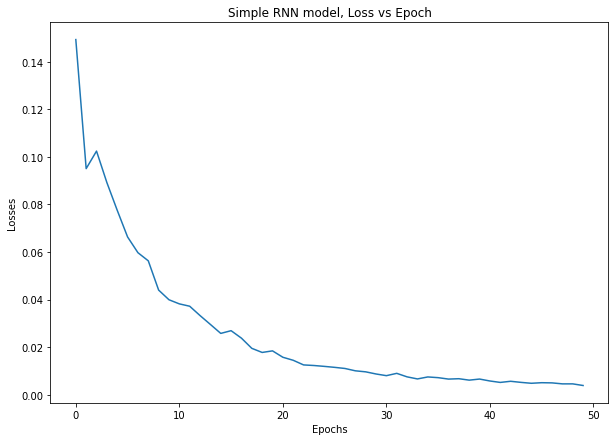

In [22]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

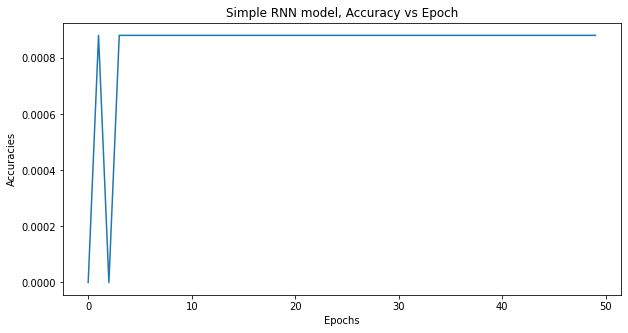

In [23]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

### Model Predictions for train data:

In [24]:
y_pred = model.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

(1134, 1)

In [25]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1134, 1)

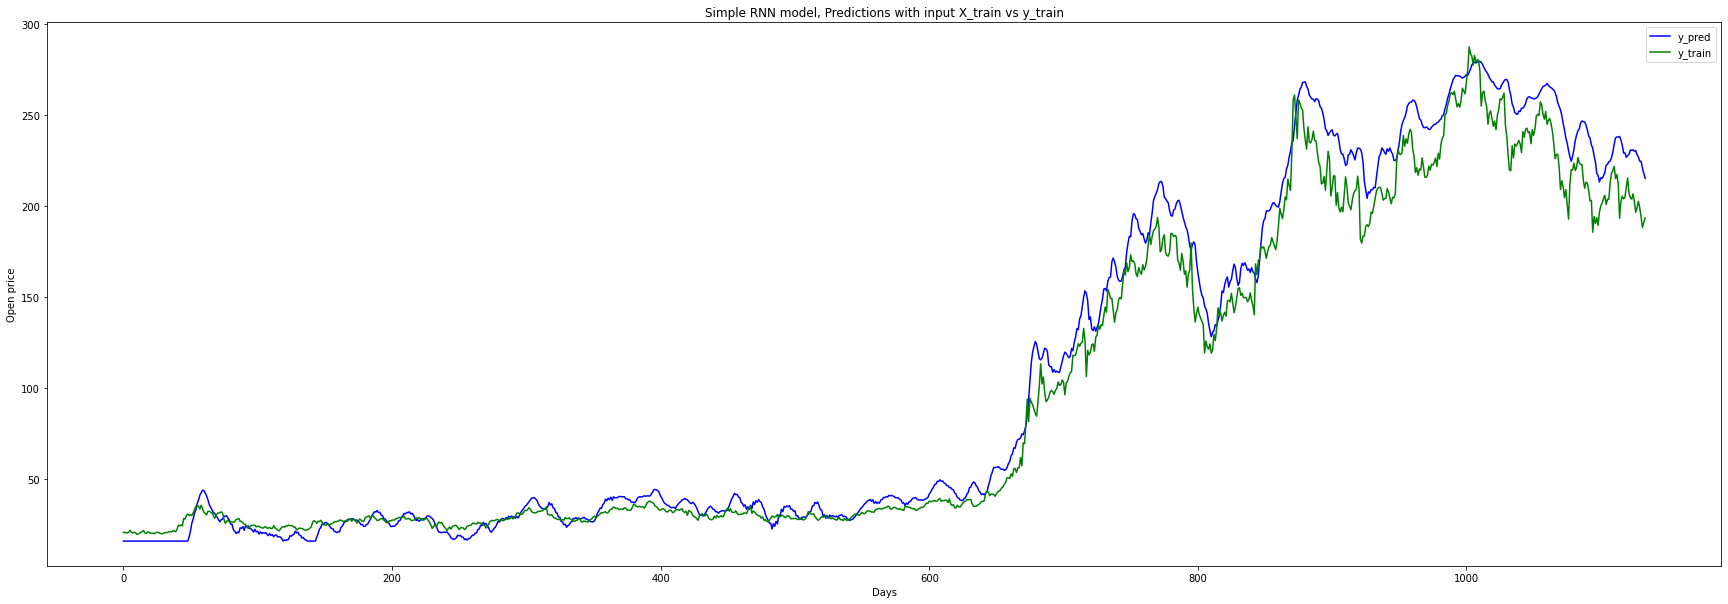

In [26]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

### Creating Test Dataset from Validation Data

In [27]:
# Converting array and scaling

dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (508, 1)


In [28]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [29]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [30]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (458, 50)
Shape of y_test before reshape : (458,)


In [31]:
### Reshaping:

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (458, 50, 1)
Shape of y_test after reshape : (458, 1)


### Evaluating with Validation Data

In [32]:
# predictions with X_test data
y_pred_of_test = model.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

Shape of y_pred_of_test : (458, 1)


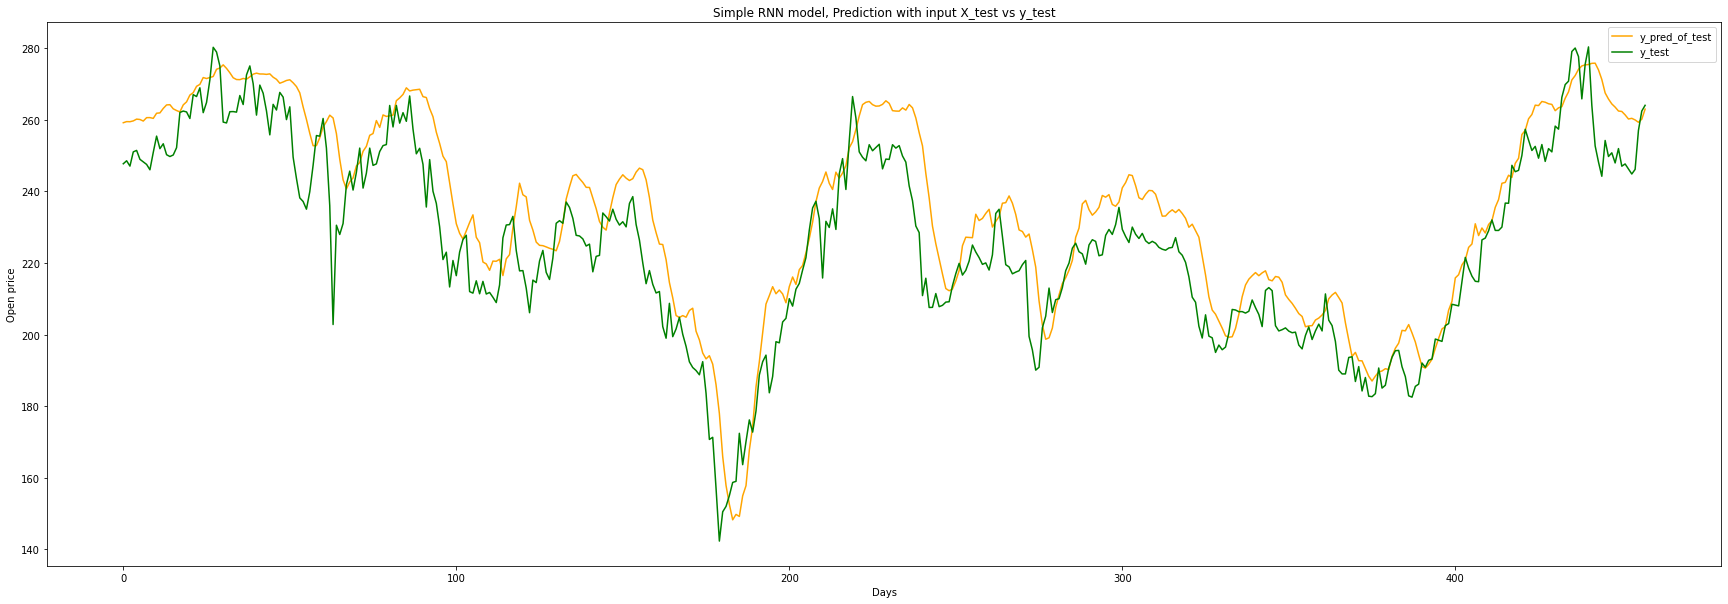

In [33]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

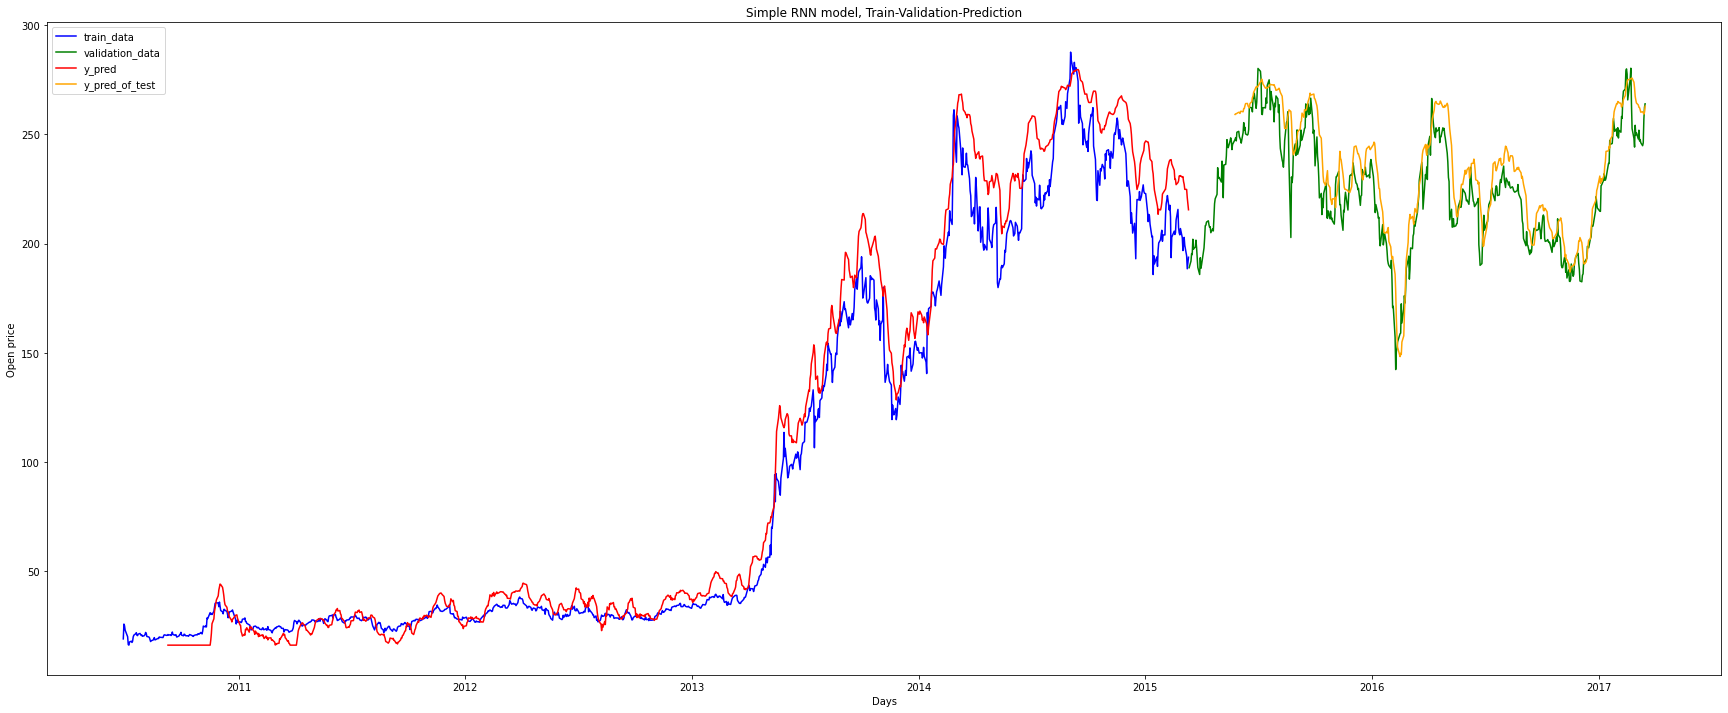

In [34]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()